In [6]:
# import skimage.io as io
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
brain_path = 'BRATS-2/Image_Data/HG/0001/VSD.Brain.XX.O.MR_T1/VSD.Brain.XX.O.MR_T1.685.mha'
brain_img = SimpleITK.ReadImage(brain_path)
truth_path = 'BRATS-2/Image_Data/HG/0001/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6560.mha'
truth_img = SimpleITK.ReadImage(truth_path)
atlas_path = 'Atlas/mni_icbm152_t1_tal_nlin_sym_09a.nii'
atlas_img = SimpleITK.ReadImage(atlas_path)

In [13]:
def sitk_show(img, title=None, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

<type 'numpy.ndarray'>


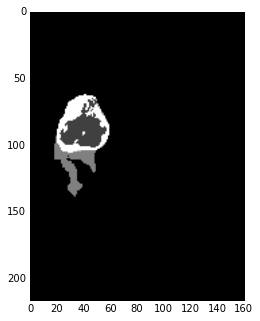

In [172]:
sitk_show(truth_img[:,:,65])

<type 'numpy.ndarray'>


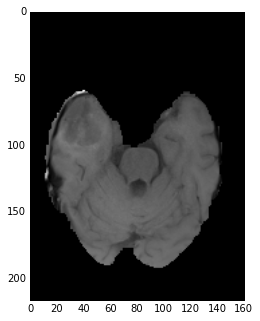

In [173]:
sitk_show(brain_img[:,:,65])

In [167]:
type(brain_img)

SimpleITK.SimpleITK.Image

In [10]:
mask_path = 'Atlas/mni_icbm152_t1_tal_nlin_sym_09a_mask.nii'
mask_img = SimpleITK.ReadImage(mask_path)

<type 'numpy.ndarray'>


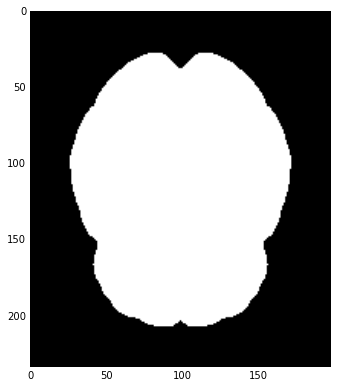

In [178]:
sitk_show(mask_img[:,:,65])

<type 'numpy.ndarray'>


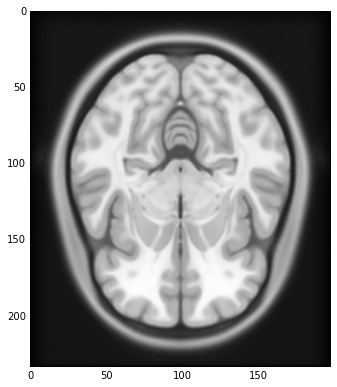

In [180]:
sitk_show(atlas_img[:,:,65])

In [184]:
SimpleITK.GetArrayFromImage(mask_img)[0,0,0]

0.0

In [11]:
mask = SimpleITK.GetArrayFromImage(brain_img)
mask[mask > 0] = 1
mask = SimpleITK.GetImageFromArray(mask)

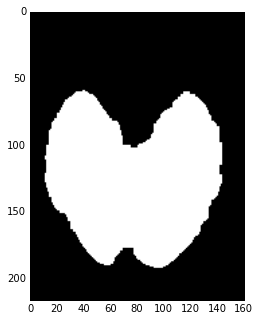

In [14]:
sitk_show(mask[:,:,65])

In [17]:
SimpleITK.WriteImage(mask, 'BRATS-2/Image_Data/HG/0001/Mask/mask.mha')

In [18]:
m = SimpleITK.ReadImage('BRATS-2/Image_Data/HG/0001/Mask/mask.mha')

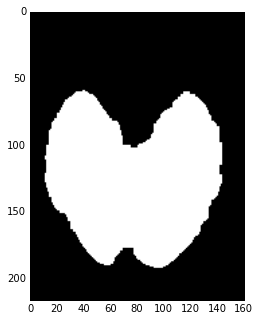

In [19]:
sitk_show(m[:,:,65])